In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('WHR-2024-5CS037.csv') #we have created a data frame by name df

In [3]:
df.head(10) #display the first 10 rows of the dataset 


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [4]:
rows,columns=df.shape #identify the number of rows and columns 
print(f"number of rows :{rows},number of columns:{columns}")

number of rows :143,number of columns:9


In [5]:
print(df.dtypes) #list all the columns and their data type 

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [6]:
# Basic Statistics for the 'Score' column
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

print(f"Mean of Score: {mean_score:.2f}")
print(f"Median of Score: {median_score:.2f}")
print(f"Standard Deviation of Score: {std_score:.2f}")

Mean of Score: 5.53
Median of Score: 5.79
Standard Deviation of Score: 1.17


In [7]:
# Identify country with the highest and lowest happiness scores
highest_score_country = df.loc[df['score'].idxmax()]['Country name']
lowest_score_country = df.loc[df['score'].idxmin()]['Country name']

print(f"Country with the highest happiness score: {highest_score_country}")
print(f"Country with the lowest happiness score: {lowest_score_country}")

Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


In [10]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [11]:
# Filter countries with a Score greater than 7.5
filtered_df = df[df['score'] > 7.5]

print("Countries with a Score greater than 7.5:")
print(filtered_df)


Countries with a Score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [12]:
# Sort the filtered dataset by GDP per Capita in descending order
sorted_filtered_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)

# Display the top 10 rows of the sorted dataset
print("Top 10 countries with Score > 7.5 sorted by GDP per Capita:")
print(sorted_filtered_df.head(10))


Top 10 countries with Score > 7.5 sorted by GDP per Capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [13]:
# Create a new column "Happiness Category"
df['Happiness Category'] = pd.cut(df['score'], bins=[-float('inf'), 4, 6, float('inf')], labels=['Low', 'Medium', 'High'])

print("Dataset with Happiness Category:")
print(df[['Country name', 'score', 'Happiness Category']])


Dataset with Happiness Category:
         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


C:\Users\mingma\AppData\Local\Temp\ipykernel_5544\997717790.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score',y='Country name',data=top10_happiest,palette="viridis")


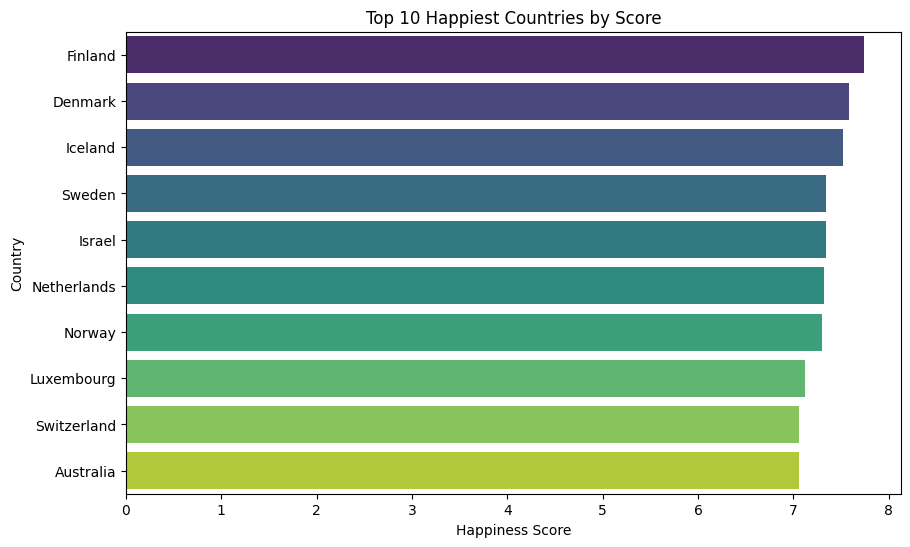

In [14]:
#bar plot :top 10 happiest countries 
import matplotlib.pyplot as plt 
import seaborn as sns

top10_happiest =df.nlargest(10,'score')
#bar chart visualization 
plt.figure(figsize=(10,6))
sns.barplot(x='score',y='Country name',data=top10_happiest,palette="viridis")
plt.title("Top 10 Happiest Countries by Score")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

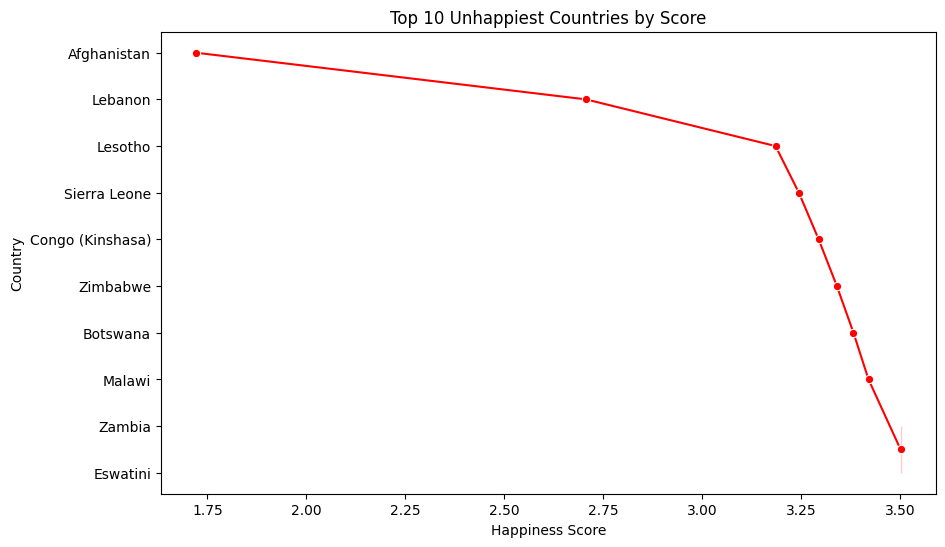

In [15]:
#line plot: top 10 unhappiest countries 
#top 10 unhappiest countries 
top10_unhappiest =df.nsmallest(10,'score')
#line visualization
plt.figure(figsize=(10,6))
sns.lineplot(x='score',y='Country name', data=top10_unhappiest,marker='o',color='red')
plt.title("Top 10 Unhappiest Countries by Score")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()


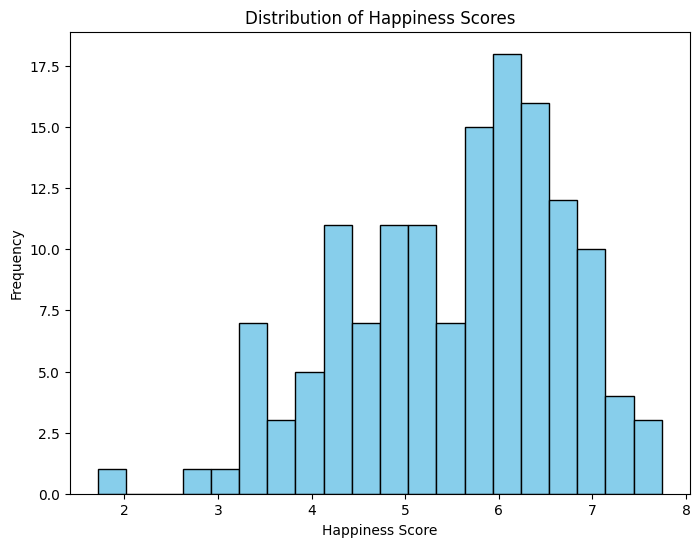

Interpretation: The histogram shows how Happiness Scores are distributed. If the data clusters to the right, most countries have high happiness scores. If it is skewed to the left, most countries are less happy.


In [16]:
#histogram to show the distribution of happiness scores 
plt.figure(figsize=(8, 6))
plt.hist(df['score'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

# Interpretation
print("Interpretation: The histogram shows how Happiness Scores are distributed. "
      "If the data clusters to the right, most countries have high happiness scores. "
      "If it is skewed to the left, most countries are less happy.")


In [21]:
#3.2 problem _2_some advance data exploration 

# Step 1: Define the list of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", 
                         "Maldives", "Nepal", "Pakistan", "Srilanka"]

# Step 2: Filter the dataset to include only South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Display the filtered dataframe
print("Filtered South Asia Dataset:")
print(south_asia_df)

# Step 3: Save the filtered dataframe as a new CSV file
output_file_path = "South_Asia_Happiness.csv"
south_asia_df.to_csv(output_file_path, index=False)

print(f"Filtered South Asia dataset has been saved to {output_file_path}")


Filtered South Asia Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             Medium  
1

C:\Users\mingma\AppData\Local\Temp\ipykernel_5544\59317268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite score'] = (0.40 * south_asia_df['Log GDP per capita']) + \
C:\Users\mingma\AppData\Local\Temp\ipykernel_5544\59317268.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite score', y='Country name', data=top5_composite, palette='coolwarm')


South Asia Dataset with Composite score:
    Country name  Composite score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
128   Bangladesh           0.6774
142  Afghanistan           0.3238

Ranked South Asian Countries by Composite score:
    Country name  Composite score
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


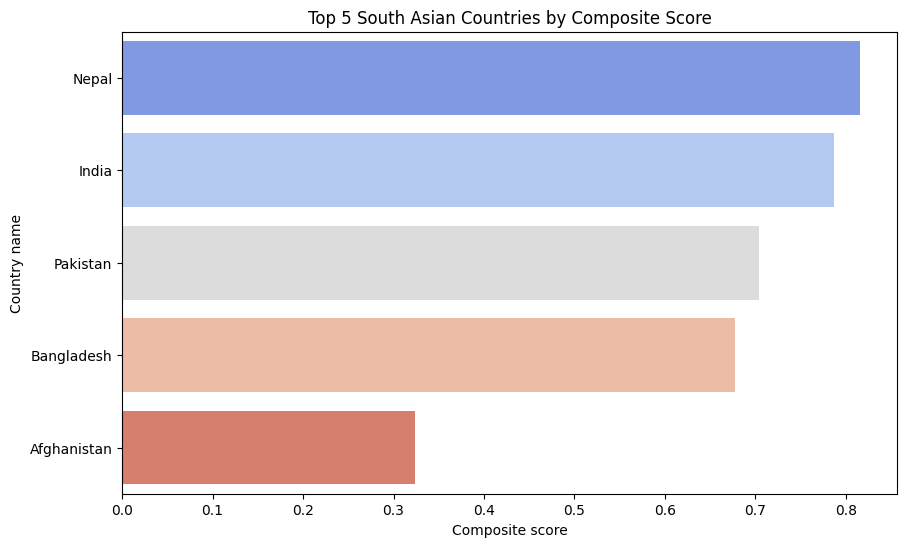

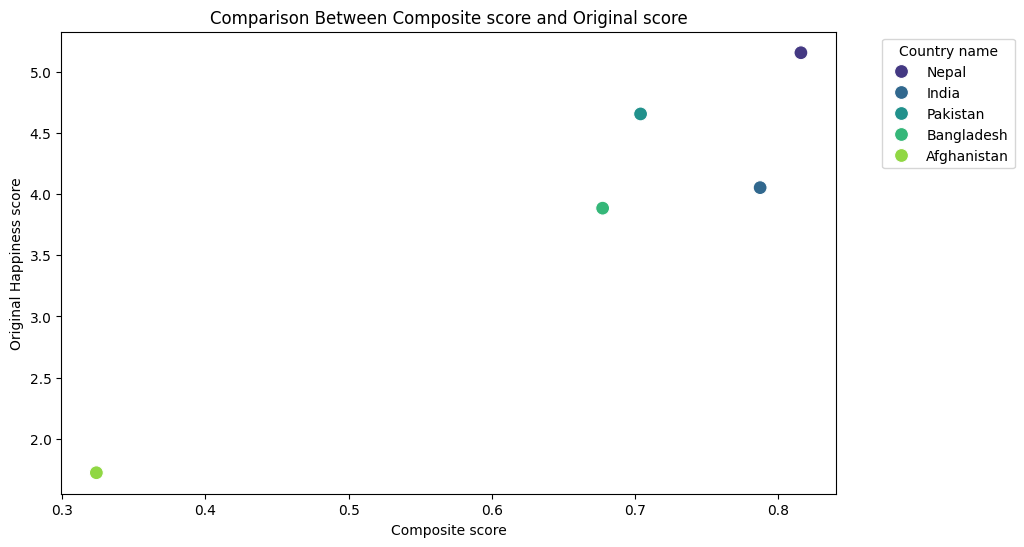

In [22]:
#task 2 composite score ranking
# Step 1: Create the Composite Score column
# Formula: Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy
south_asia_df['Composite score'] = (0.40 * south_asia_df['Log GDP per capita']) + \
                                   (0.30 * south_asia_df['Social support']) + \
                                   (0.30 * south_asia_df['Healthy life expectancy'])

# Display the updated dataframe with the new column
print("South Asia Dataset with Composite score:")
print(south_asia_df[['Country name', 'Composite score']])

# Step 2: Rank South Asian countries based on the Composite Score in descending order
south_asia_ranked = south_asia_df.sort_values(by='Composite score', ascending=False)

# Display the ranked countries
print("\nRanked South Asian Countries by Composite score:")
print(south_asia_ranked[['Country name', 'Composite score']])

# Step 3: Visualize the top 5 countries using a horizontal bar chart
top5_composite = south_asia_ranked.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite score', y='Country name', data=top5_composite, palette='coolwarm')
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite score")
plt.ylabel("Country name")
plt.show()

# Step 4: Compare Composite Score with Original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite score', y='score', data=south_asia_ranked, hue='Country name', palette='viridis', s=100)
plt.title("Comparison Between Composite score and Original score")
plt.xlabel("Composite score")
plt.ylabel("Original Happiness score")
plt.legend(title='Country name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



Outliers based on 'score' and 'Log GDP per capita':
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


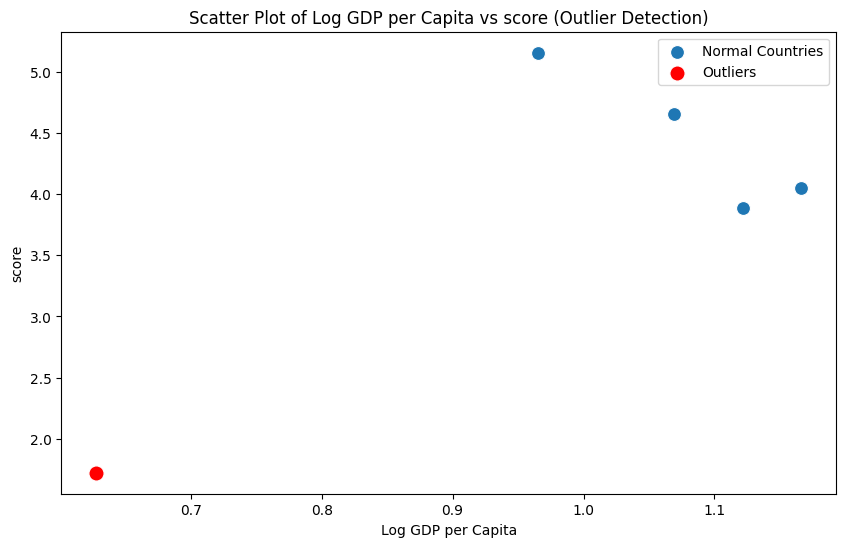

Lower and Upper Bounds for 'Score': 2.7295000000000003 5.8134999999999994
Lower and Upper Bounds for 'GDP per capita': 0.7294999999999998 1.3575000000000004

Observations:
- The countries highlighted in red are identified as outliers based on the 1.5 × IQR rule.
- These outliers may have extreme values for 'Score' or 'GDP per capita', which can skew regional averages.
- For example, a country with exceptionally high GDP per capita but a low happiness score can significantly affect the average values.


In [20]:
#outlier detection
# Task 3 - Outlier Detection in South Asia Dataset

# Step 1: Identify outliers using the 1.5 × IQR rule for 'Score' and 'GDP per capita'

# Function to calculate outliers based on 1.5 * IQR rule
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First Quartile (25%)
    Q3 = data[column].quantile(0.75)  # Third Quartile (75%)
    IQR = Q3 - Q1                    # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for 'Score'
score_outliers, score_lower, score_upper = detect_outliers_iqr(south_asia_df, 'score')

# Detect outliers for 'GDP per capita'
gdp_outliers, gdp_lower, gdp_upper = detect_outliers_iqr(south_asia_df, 'Log GDP per capita')

# Combine all outliers (if a country is an outlier in either 'Score' or 'GDP per capita')
combined_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# Display the outliers
print("Outliers based on 'score' and 'Log GDP per capita':")
print(combined_outliers[['Country name', 'score', 'Log GDP per capita']])

# Step 2: Scatter Plot highlighting Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, s=100, label='Normal Countries')

# Highlight outliers in red
sns.scatterplot(x='Log GDP per capita', y='score', data=combined_outliers, color='red', s=120, label='Outliers')

plt.title("Scatter Plot of Log GDP per Capita vs score (Outlier Detection)")
plt.xlabel("Log GDP per Capita")
plt.ylabel("score")
plt.legend()
plt.show()

# Step 3: Discussion on Outliers
print("Lower and Upper Bounds for 'Score':", score_lower, score_upper)
print("Lower and Upper Bounds for 'GDP per capita':", gdp_lower, gdp_upper)

print("\nObservations:")
print("- The countries highlighted in red are identified as outliers based on the 1.5 × IQR rule.")
print("- These outliers may have extreme values for 'Score' or 'GDP per capita', which can skew regional averages.")
print("- For example, a country with exceptionally high GDP per capita but a low happiness score can significantly affect the average values.")



Pearson Correlation with 'score':
- Freedom to make life choices: 0.801
- Generosity: 0.877


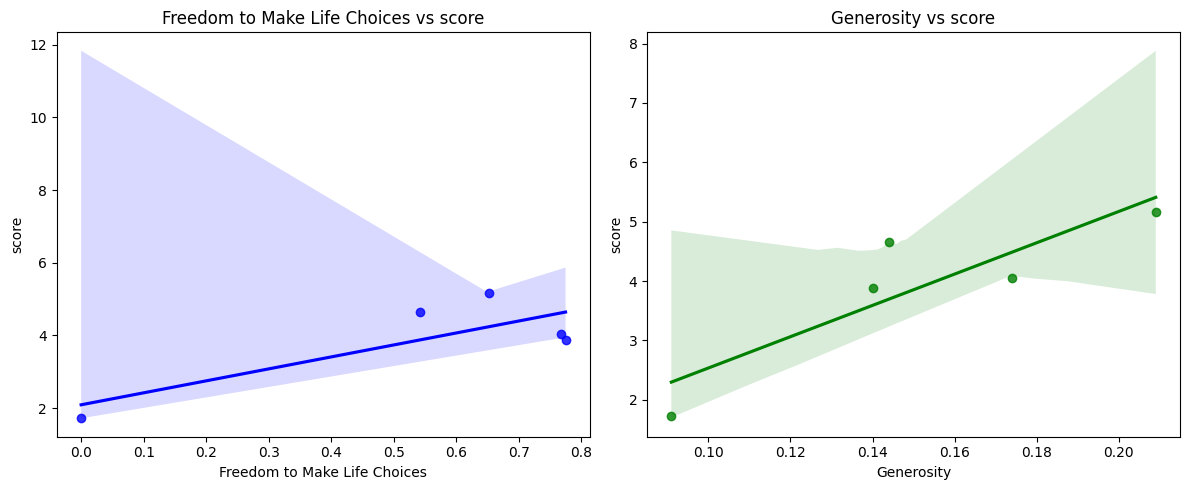


Observations:
- The strongest relationship with 'Score' is observed for 'Generosity' with a correlation of 0.877.
- The weakest relationship with 'Score' is observed for 'Freedom to make life choices' with a correlation of 0.801.
- From the scatter plots, we can observe how these metrics relate to happiness scores in South Asia.


In [33]:
#task 4: exploring trends across metrics
# Task 4 - Exploring Trends Across Metrics

# Step 1: Choose two metrics and calculate Pearson correlation with 'Score'
metrics = ['Freedom to make life choices', 'Generosity']

# Calculate Pearson correlation
correlations = {}
for metric in metrics:
    corr = south_asia_df['score'].corr(south_asia_df[metric])
    correlations[metric] = corr

# Display correlation results
print("Pearson Correlation with 'score':")
for metric, corr in correlations.items():
    print(f"- {metric}: {corr:.3f}")

# Step 2: Scatter plots with trendlines for the two metrics
plt.figure(figsize=(12, 5))

# Scatter plot for Freedom to Make Life Choices vs Score
plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, color='blue')
plt.title("Freedom to Make Life Choices vs score")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("score")

# Scatter plot for Generosity vs Score
plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asia_df, color='green')
plt.title("Generosity vs score")
plt.xlabel("Generosity")
plt.ylabel("score")

plt.tight_layout()
plt.show()

# Step 3: Identify strongest and weakest relationships
strongest_metric = max(correlations, key=correlations.get)
weakest_metric = min(correlations, key=correlations.get)

print("\nObservations:")
print(f"- The strongest relationship with 'Score' is observed for '{strongest_metric}' with a correlation of {correlations[strongest_metric]:.3f}.")
print(f"- The weakest relationship with 'Score' is observed for '{weakest_metric}' with a correlation of {correlations[weakest_metric]:.3f}.")
print("- From the scatter plots, we can observe how these metrics relate to happiness scores in South Asia.")


C:\Users\mingma\AppData\Local\Temp\ipykernel_15968\2482789286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['GDP-score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']
C:\Users\mingma\AppData\Local\Temp\ipykernel_15968\2482789286.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_positive, palette='viridis')
C:\Users\mingma\AppData\Local\Temp\ipykernel_15968\2482789286.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue

Dataset with 'GDP-Score Gap' column:
    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888
128   Bangladesh               1.122  3.886         -2.764
142  Afghanistan               0.628  1.721         -1.093

Countries ranked by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
142  Afghanistan         -1.093

Countries ranked by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


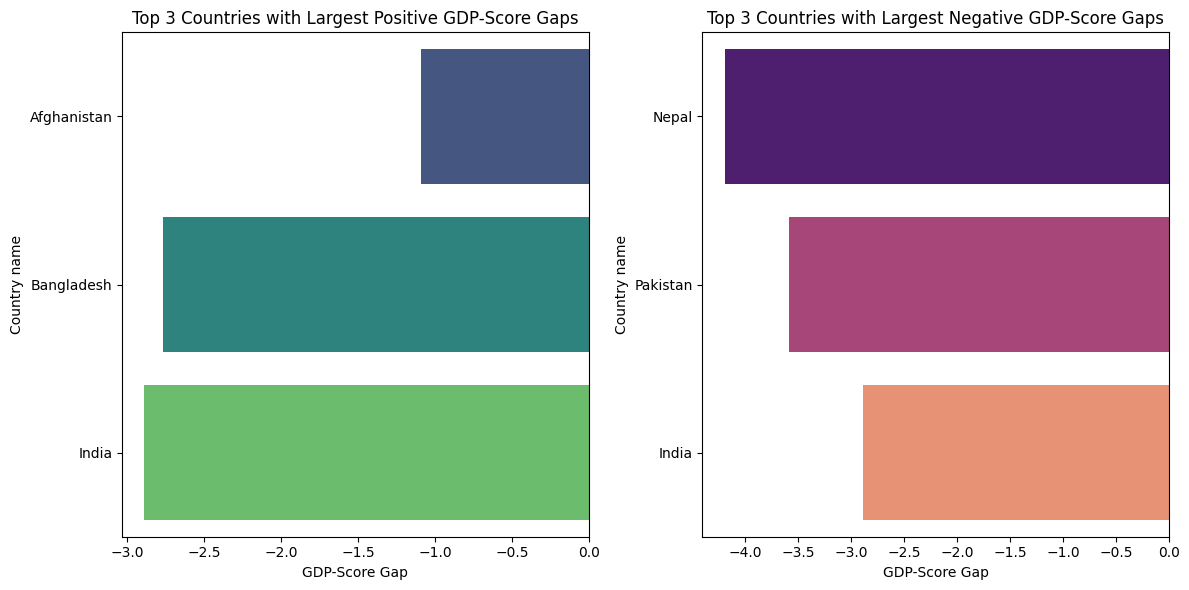


Analysis of GDP-Score Gaps:

- Positive Gaps: Countries with larger GDP per capita but relatively lower happiness scores 
  may indicate economic prosperity not translating into overall well-being. Potential reasons include:
  - Inequality in wealth distribution
  - Poor social support or governance
  - Limited access to quality healthcare or education
  
- Negative Gaps: Countries with relatively high happiness scores despite lower GDP per capita 
  may indicate strong social and cultural factors supporting well-being. Potential reasons include:
  - Strong social support systems
  - Higher levels of contentment despite economic challenges
  - Cultural or religious factors enhancing happiness levels

Implications:
- Countries with large positive gaps might need to focus on inclusive growth, better governance, and quality of life.
- Countries with large negative gaps highlight the importance of non-economic factors in happiness, offering valuable insights for policymaking.



In [36]:
#task 5 :gap analysis 
# Task 5 - Gap Analysis

# Step 1: Add a new column 'GDP-Score Gap' (difference between GDP per Capita and Score)
south_asia_df['GDP-score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Display the dataset with the new column
print("Dataset with 'GDP-Score Gap' column:")
print(south_asia_df[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

# Step 2: Rank countries by the GDP-Score Gap in ascending and descending order
# Ascending Order
gap_ascending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
print("\nCountries ranked by GDP-Score Gap (Ascending):")
print(gap_ascending[['Country name', 'GDP-Score Gap']])

# Descending Order
gap_descending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)
print("\nCountries ranked by GDP-Score Gap (Descending):")
print(gap_descending[['Country name', 'GDP-Score Gap']])

# Step 3: Highlight top 3 positive and negative gaps using bar charts
top_3_positive = gap_descending.head(3)  # Largest positive gaps
top_3_negative = gap_ascending.head(3)   # Largest negative gaps

# Visualization - Top 3 Positive and Negative Gaps
plt.figure(figsize=(12, 6))

# Top 3 Positive Gaps
plt.subplot(1, 2, 1)
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_positive, palette='viridis')
plt.title("Top 3 Countries with Largest Positive GDP-Score Gaps")
plt.xlabel("GDP-Score Gap")
plt.ylabel("Country name")

# Top 3 Negative Gaps
plt.subplot(1, 2, 2)
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_negative, palette='magma')
plt.title("Top 3 Countries with Largest Negative GDP-Score Gaps")
plt.xlabel("GDP-Score Gap")
plt.ylabel("Country name")

plt.tight_layout()
plt.show()

# Step 4: Analyze the reasons behind the gaps
print("\nAnalysis of GDP-Score Gaps:")
print("""
- Positive Gaps: Countries with larger GDP per capita but relatively lower happiness scores 
  may indicate economic prosperity not translating into overall well-being. Potential reasons include:
  - Inequality in wealth distribution
  - Poor social support or governance
  - Limited access to quality healthcare or education
  
- Negative Gaps: Countries with relatively high happiness scores despite lower GDP per capita 
  may indicate strong social and cultural factors supporting well-being. Potential reasons include:
  - Strong social support systems
  - Higher levels of contentment despite economic challenges
  - Cultural or religious factors enhancing happiness levels

Implications:
- Countries with large positive gaps might need to focus on inclusive growth, better governance, and quality of life.
- Countries with large negative gaps highlight the importance of non-economic factors in happiness, offering valuable insights for policymaking.
""")


In [37]:
#3.3 problem 3_comparative analysis in jupyter notebook 
#task 1 :preparing the middle eastern dataset
# Task 1 - Setup Task: Preparing the Middle Eastern Dataset

# Step 1: Define the list of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", 
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", 
    "Syria", "United Arab Emirates", "Yemen"
]

# Step 2: Filter the dataset for Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# Display the filtered Middle Eastern dataset
print("Middle Eastern Dataset:")
print(middle_east_df)

# Step 3: Save the filtered dataset to a CSV file
middle_east_df.to_csv("Middle_East_Dataset.csv", index=False)
print("Middle Eastern dataset saved to 'Middle_East_Dataset.csv'")


Middle Eastern Dataset:
             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661       

In [38]:
#task 1.1 descriptive statistics 
# Task 1.1 - Descriptive Statistics

# Calculate mean and standard deviation for Scores in South Asia and Middle East
mean_score_sa = south_asia_df['score'].mean()
std_score_sa = south_asia_df['score'].std()

mean_score_me = middle_east_df['score'].mean()
std_score_me = middle_east_df['score'].std()

print(f"South Asia - Mean Score: {mean_score_sa:.2f}, Standard Deviation: {std_score_sa:.2f}")
print(f"Middle East - Mean Score: {mean_score_me:.2f}, Standard Deviation: {std_score_me:.2f}")

# Compare which region has higher happiness scores
if mean_score_me > mean_score_sa:
    print("Middle East has higher happiness scores on average.")
else:
    print("South Asia has higher happiness scores on average.")


South Asia - Mean Score: 3.90, Standard Deviation: 1.32
Middle East - Mean Score: 5.41, Standard Deviation: 1.57
Middle East has higher happiness scores on average.



Top 3 Happiest Countries in South Asia:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 Happiest Countries in South Asia:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
125        India  4.054

Top 3 Happiest Countries in Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Happiest Countries in Middle East:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


C:\Users\mingma\AppData\Local\Temp\ipykernel_15968\2034681962.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([top_3_sa, top_3_me]), palette='viridis')
C:\Users\mingma\AppData\Local\Temp\ipykernel_15968\2034681962.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([bottom_3_sa, bottom_3_me]), palette='magma')


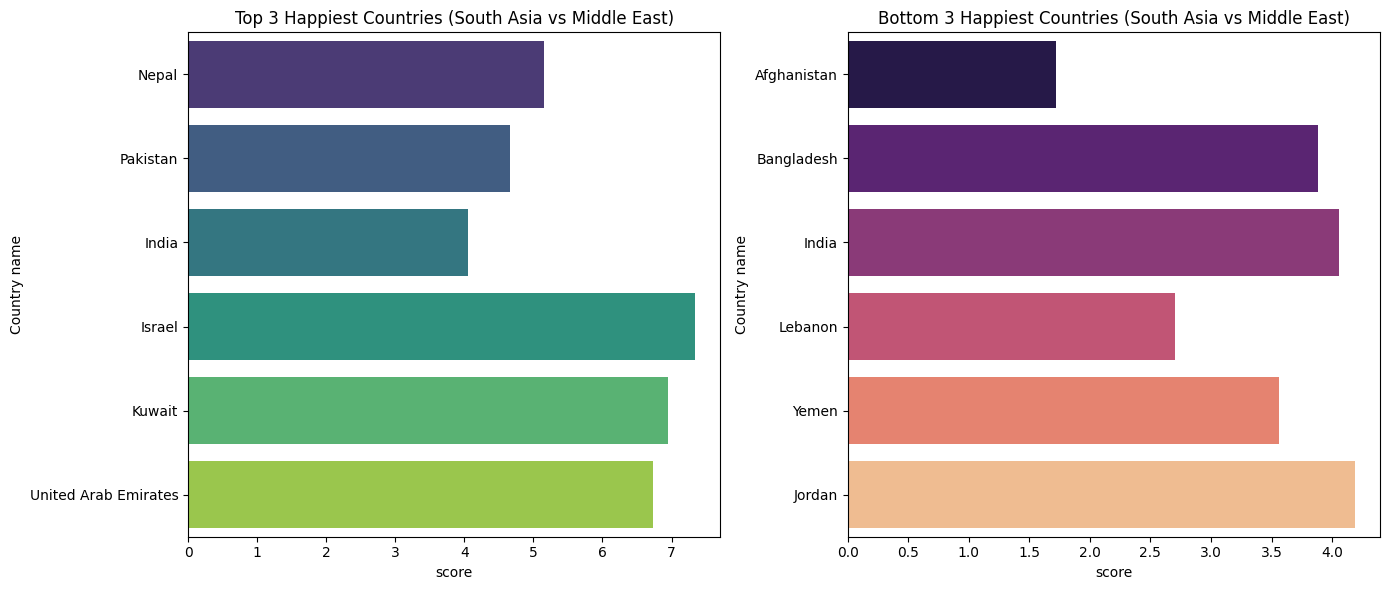

In [40]:
#task 1.2:  top and bottom performers
# Task 1.2 - Top and Bottom Performers

# Top 3 and Bottom 3 countries in South Asia
top_3_sa = south_asia_df.nlargest(3, 'score')
bottom_3_sa = south_asia_df.nsmallest(3, 'score')

# Top 3 and Bottom 3 countries in Middle East
top_3_me = middle_east_df.nlargest(3, 'score')
bottom_3_me = middle_east_df.nsmallest(3, 'score')

print("\nTop 3 Happiest Countries in South Asia:")
print(top_3_sa[['Country name', 'score']])

print("\nBottom 3 Happiest Countries in South Asia:")
print(bottom_3_sa[['Country name', 'score']])

print("\nTop 3 Happiest Countries in Middle East:")
print(top_3_me[['Country name', 'score']])

print("\nBottom 3 Happiest Countries in Middle East:")
print(bottom_3_me[['Country name', 'score']])

# Bar charts for comparison
plt.figure(figsize=(14, 6))

# Top Performers
plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_sa, top_3_me]), palette='viridis')
plt.title("Top 3 Happiest Countries (South Asia vs Middle East)")
plt.xlabel("score")

# Bottom Performers
plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=pd.concat([bottom_3_sa, bottom_3_me]), palette='magma')
plt.title("Bottom 3 Happiest Countries (South Asia vs Middle East)")
plt.xlabel("score")

plt.tight_layout()
plt.show()



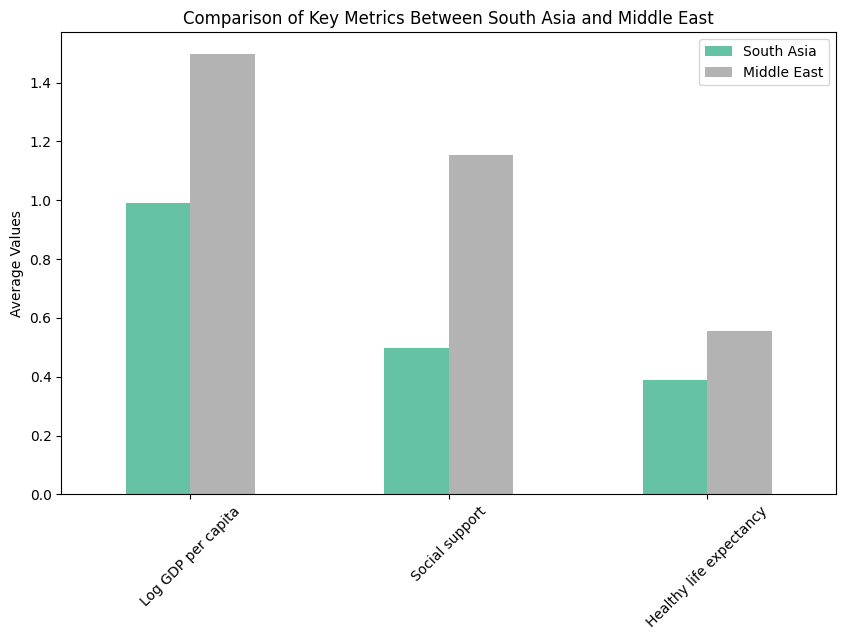


The metric with the largest disparity is: Social support


In [41]:
#task 1.3: metirc comparisons 
# Task 1.3 - Metric Comparisons

# Metrics: GDP per Capita, Social Support, Healthy Life Expectancy
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Calculate means for the metrics in both regions
means_sa = south_asia_df[metrics].mean()
means_me = middle_east_df[metrics].mean()

# Combine the means into a dataframe for visualization
metrics_comparison = pd.DataFrame({
    'South Asia': means_sa,
    'Middle East': means_me
})

# Grouped bar chart for metric comparisons
metrics_comparison.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Comparison of Key Metrics Between South Asia and Middle East")
plt.ylabel("Average Values")
plt.xticks(rotation=45)
plt.show()

# Identify the largest disparity
largest_disparity = (means_me - means_sa).abs().idxmax()
print(f"\nThe metric with the largest disparity is: {largest_disparity}")



In [42]:
#task 1.4: happiness disparity 
# Task 1.4 - Happiness Disparity

# Calculate range and coefficient of variation for Score
range_sa = south_asia_df['score'].max() - south_asia_df['score'].min()
cv_sa = south_asia_df['score'].std() / south_asia_df['score'].mean()

range_me = middle_east_df['score'].max() - middle_east_df['score'].min()
cv_me = middle_east_df['score'].std() / middle_east_df['score'].mean()

print(f"South Asia - Range: {range_sa:.2f}, CV: {cv_sa:.2f}")
print(f"Middle East - Range: {range_me:.2f}, CV: {cv_me:.2f}")

if cv_me > cv_sa:
    print("Middle East has greater variability in happiness.")
else:
    print("South Asia has greater variability in happiness.")



South Asia - Range: 3.44, CV: 0.34
Middle East - Range: 4.63, CV: 0.29
South Asia has greater variability in happiness.



Correlation with Score (South Asia):
Freedom to make life choices    0.801498
Generosity                      0.877333
score                           1.000000
Name: score, dtype: float64

Correlation with Score (Middle East):
Freedom to make life choices    0.863220
Generosity                      0.627524
score                           1.000000
Name: score, dtype: float64


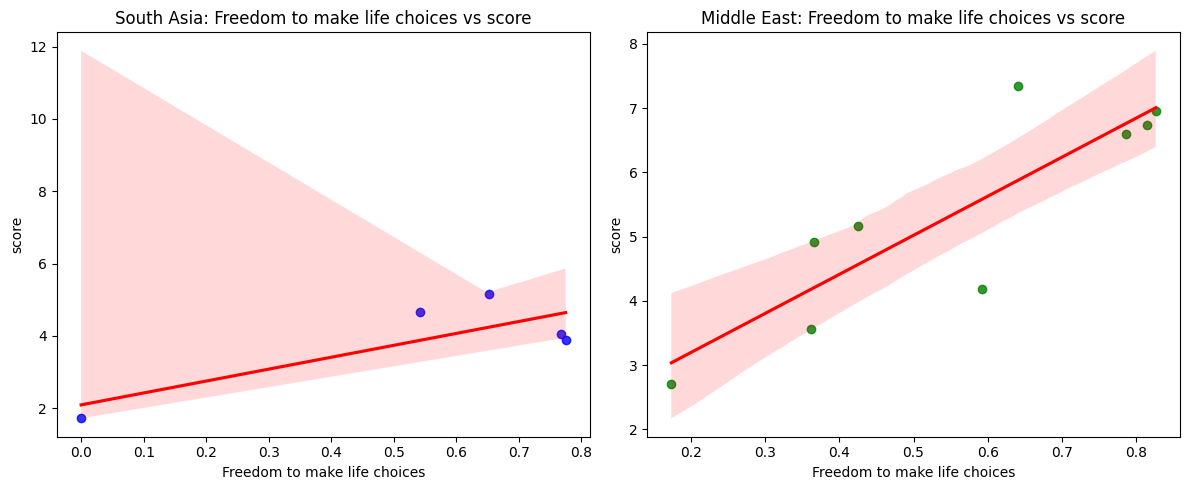

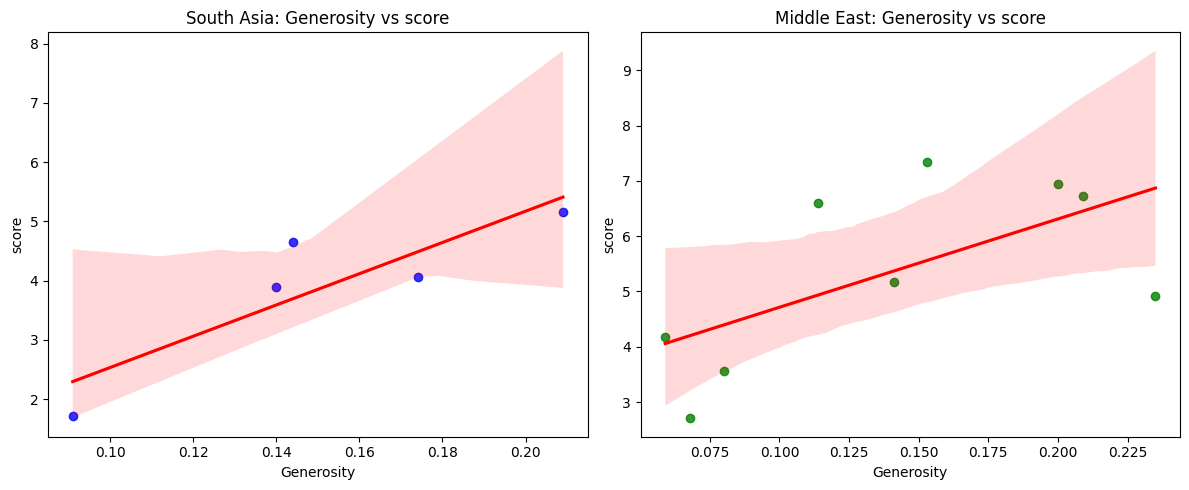

In [44]:
#task 1.5 correlation analysis 
# Task 1.5 - Correlation Analysis

# Metrics: Freedom to Make Life Choices and Generosity
metrics_to_compare = ['Freedom to make life choices', 'Generosity']

# Calculate correlations for both regions
corr_sa = south_asia_df[metrics_to_compare + ['score']].corr()['score']
corr_me = middle_east_df[metrics_to_compare + ['score']].corr()['score']

print("\nCorrelation with Score (South Asia):")
print(corr_sa)

print("\nCorrelation with Score (Middle East):")
print(corr_me)

# Scatter plots with trendlines
for metric in metrics_to_compare:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.regplot(x=metric, y='score', data=south_asia_df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
    plt.title(f"South Asia: {metric} vs score")
    
    plt.subplot(1, 2, 2)
    sns.regplot(x=metric, y='score', data=middle_east_df, scatter_kws={'color':'green'}, line_kws={'color':'red'})
    plt.title(f"Middle East: {metric} vs score")
    
    plt.tight_layout()
    plt.show()


In [48]:
#task 1.6 outlier detection
# Task 1.6 - Outlier Detection for Both Regions

# Combine datasets and identify outliers using IQR method
combined_df = pd.concat([south_asia_df, middle_east_df])

for region, data in [('South Asia', south_asia_df), ('Middle East', middle_east_df)]:
    q1 = data['score'].quantile(0.25)
    q3 = data['score'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = data[(data['score'] < lower_bound) | (data['score'] > upper_bound)]
    print(f"\nOutliers in {region}:")
    print(outliers[['Country name', 'score']])



Outliers in South Asia:
    Country name  score
142  Afghanistan  1.721

Outliers in Middle East:
Empty DataFrame
Columns: [Country name, score]
Index: []


C:\Users\mingma\AppData\Local\Temp\ipykernel_15968\295666669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Region'] = 'South Asia'
C:\Users\mingma\AppData\Local\Temp\ipykernel_15968\295666669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_df['Region'] = 'Middle East'


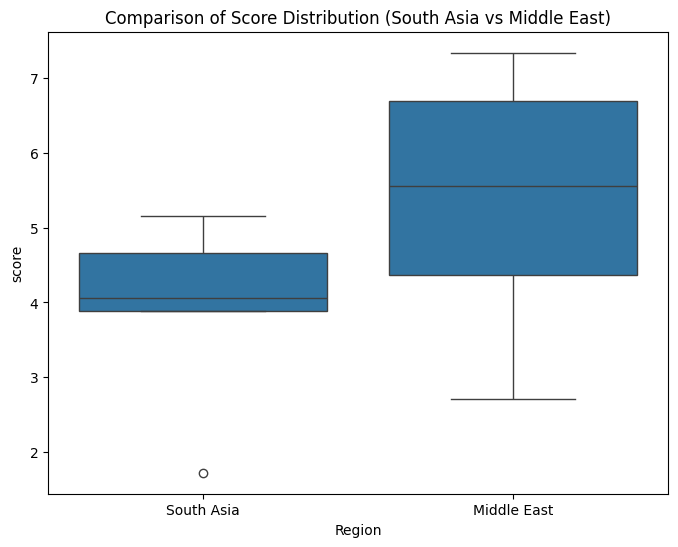

In [49]:
# Step 1: Add a 'Region' column to the datasets
south_asia_df['Region'] = 'South Asia'
middle_east_df['Region'] = 'Middle East'

# Step 2: Combine both datasets
combined_df = pd.concat([south_asia_df, middle_east_df])

# Step 3: Boxplot comparison of Score between South Asia and Middle East
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='score', data=combined_df)
plt.title("Comparison of Score Distribution (South Asia vs Middle East)")
plt.xlabel("Region")
plt.ylabel("score")
plt.show()


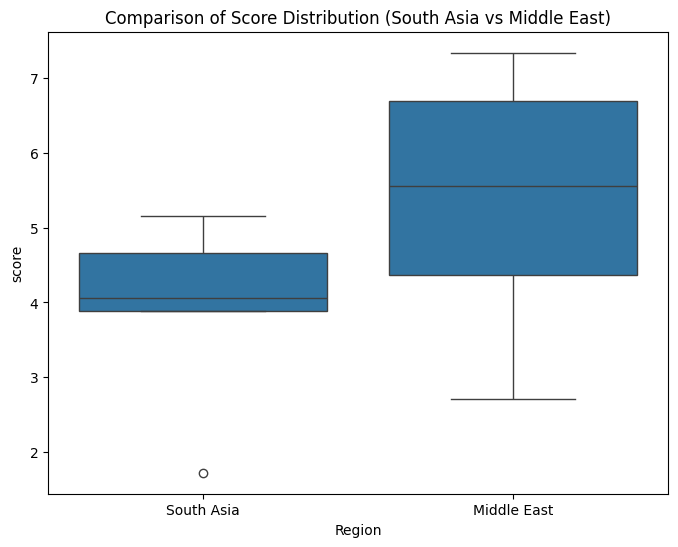

In [50]:
#final visualization :boxplot comparison 
# Boxplot comparison of Score between South Asia and Middle East
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='score', data=combined_df)
plt.title("Comparison of Score Distribution (South Asia vs Middle East)")
plt.xlabel("Region")
plt.ylabel("score")
plt.show()
